In [1]:
import cv2
import sys
import numpy as np
from tensorflow.keras import models

In [2]:
MODEL_PATH = "tf-cnn-model.h5"

In [3]:
def predict_digit(image_path):
    
    # load model
    model = models.load_model(MODEL_PATH)
    print("[INFO] Loaded model from disk.")

    image = cv2.imread(image_path, 0)      
    image1 = cv2.resize(image, (28,28))    # For cv2.imshow: dimensions should be 28x28
    image2 = image1.reshape(1,28,28,1)

    cv2.imshow('digit', image1 )
    pred = np.argmax(model.predict(image2), axis=-1)
    return pred[0]

In [4]:
def main(image_path):
    predicted_digit = predict_digit(image_path)
    print('Predicted Digit: {}'.format(predicted_digit))

In [5]:
if __name__ == "__main__":
    try:
        main(image_path = sys.argv[1])
    except:
        print('[ERROR]: Image not found')

[INFO] Loaded model from disk.
[ERROR]: Image not found


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [10]:
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)


TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


In [11]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

In [13]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


C:\Users\91984\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 158s 83ms/step - loss: 0.1307 - accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0317 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0269 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 155s 82ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0151 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 154s 82ms

Text(0.5, 1.0, 'Training Accuracy and Loss')

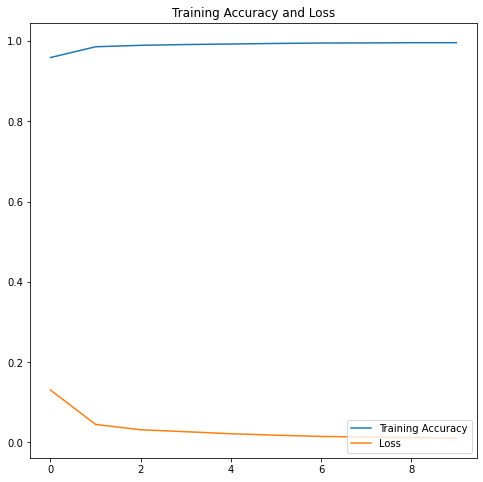

In [14]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')